In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords #Natural Language for 
import string
import matplotlib.pyplot as plt

# Loading DataSet

In [2]:
#loading data frame using pandas module
spamData_frame = pd.read_csv("spam.csv",encoding = 'latin-1')

encoding is set to latin-1 which is a code for standard ISO for characters in most EU Languages

In [3]:
spamData_frame.head(5)

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Preprocessing & Stats

In [4]:
spamData_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
spamData_frame.describe()

,label,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
spamData_frame['Unnamed: 2'].unique()

array([nan, ' PO Box 5249',
       ' the person is definitely special for u..... But if the person is so special',
       ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""',
       ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"',
       'this wont even start........ Datz confidence.."', 'GN',
       '.;-):-D"',
       'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""',
       ' bt not his girlfrnd... G o o d n i g h t . . .@"',
       ' I\'ll come up"',
       ' don\'t miss ur best life for anything... Gud nyt..."',
       ' just as a shop has to give a guarantee on what they sell. B. G."',
       ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"',
       ' the toughest is acting Happy with all unspoken pain inside..\\""',
       ' smoke hella weed\\""', '\\" not \\"what i need to do.\\""',
       'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD

In [7]:
spamData_frame['Unnamed: 3'].unique()

array([nan, ' MK17 92H. 450Ppw 16"', ' why to miss them', 'GE',
       'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""',
       'i wil tolerat.bcs ur my someone..... But',
       ' ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\\""',
       'whoever is the KING\\"!... Gud nyt"', ' TX 4 FONIN HON',
       ' \\"OH No! COMPETITION\\". Who knew', 'IåÕL CALL U\\""'],
      dtype=object)

In [8]:
spamData_frame['Unnamed: 4'].unique()

array([nan, ' just Keep-in-touch\\" gdeve.."', 'GNT:-)"',
       ' Never comfort me with a lie\\" gud ni8 and sweet dreams"',
       ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""',
       ' one day these two will become FREINDS FOREVER!"'], dtype=object)

In [9]:
# there are 5572 rows and 5 columns in total including the 
spamData_frame.shape

(5572, 5)

In [10]:
spamData_frame.isnull().sum()

label            0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Column No 3,4,5 contains very small unique values. Most of them are null values. So, they will not effect the dataset as much. we will drop them rather than merging with text column. 

In [11]:
#Dropping Unnecessory columns
spamData_frame.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1,inplace=True)

In [12]:
spamData_frame.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#dropping duplicate rows to avoid overfitting or undersitting problems
spamData_frame.drop_duplicates('text',inplace=True)

In [14]:
spamData_frame.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
spamData_frame.shape

(5169, 2)

# Label Encoding 

As we know that machine learning models only deal with the numbers and they cannot process strings. Our label column is string we will encode it into numbers based on the number of unique values.

In [16]:
spamData_frame.label.unique()

array(['ham', 'spam'], dtype=object)

In [17]:
#Using Label Encoder we will encode the label column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
spamData_frame['label'] = encoder.fit_transform(spamData_frame.label)

In [18]:
#You can observe the change
spamData_frame.label.unique()

array([0, 1])

In [19]:
spamData_frame.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Reducing Dimentionality and Noise  

Stopwords are words that are commonly used in a language but do not provide much meaning on their own. They are usually removed from texts during natural language processing tasks because they do not contribute much to the overall meaning of the text. Examples of stopwords include articles (a, an, the), conjunctions (and, but, or), and prepositions (in, on, at).

Stopwords are often used as a way to improve the performance of natural language processing tasks, such as text classification, by reducing the dimensionality of the data. Removing stopwords can also help to reduce the noise in a text and make it easier to identify the important themes and concepts. However, it is important to note that stopwords can sometimes carry important meaning in a particular context, so it is not always appropriate to remove them.

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\usman
[nltk_data]     jalil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Vectorization & Data Cleaning


In [21]:
def cleaning_data(text):
    # removing all the punctuations using string package
    puncfreetext = [value for value in text if value not in string.punctuation]
    puncfreetext = ''.join(puncfreetext)
    # using stopwords package natural language toolkit to drop all the unnecessory words 
    word_text = [word for word in puncfreetext.split() if word.lower() not in stopwords.words('english')]
    return word_text

In [22]:
#applying cleaning function to the text column.
spamData_frame['text'].head().apply(cleaning_data)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

## 1NF (First Normal Form)

In [23]:
spamData_frame.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


As described above the machine learning models cannot work with integers. So, there is a very famous language processing technique which is called vectorization. In this technique, we make vectors of tags using different techniques. 

## Bag of Words Technique of Vectorization

The bag of words technique is a method for representing text data as numerical vectors. It is commonly used in natural language processing tasks as a way to convert text into a numerical form that can be input into machine learning models.

The basic idea behind the bag of words technique is to represent each document (e.g., a sentence, a paragraph, or a whole article) as a fixed-length vector, where each element in the vector corresponds to a particular word in the vocabulary. The value of each element in the vector is determined by the frequency of the corresponding word in the document.

In [24]:
#bag of words technique will be used
from sklearn.feature_extraction.text import CountVectorizer
messages = CountVectorizer(analyzer=cleaning_data).fit_transform(spamData_frame['text'])

In [25]:
messages.shape

(5169, 11304)

# Data Visualization

In [26]:
spamData_frame.groupby('label').count()

,text
label,
0,4516
1,653


In [27]:
#checking the frequency of spam and ham data
spam = spamData_frame[spamData_frame['label']==1]['label'].agg(len)
print(spam)
ham = spamData_frame[spamData_frame['label']==0]['label'].agg(len)
print(ham)

653
4516


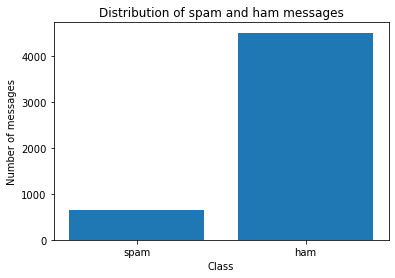

In [28]:
plt.bar(['spam', 'ham'], [spam, ham])
plt.xlabel('Class')
plt.ylabel('Number of messages')
plt.title('Distribution of spam and ham messages')

# Show the plot
plt.show()

87% of data of emails are under the label of ham (meaning no spam) and 13% data is under the label of spam

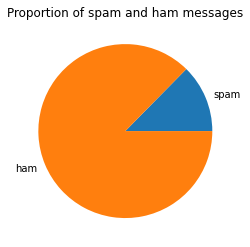

In [53]:
#visualization of proportion of spam and ham labels in data set
spam_percentage = spam / (spam + ham) * 100
ham_percentage = ham / (spam + ham) * 100

# Set up the pie chart
plt.pie([spam_percentage, ham_percentage], labels=['spam', 'ham'])
plt.title('Proportion of spam and ham messages')

# Show the plot
plt.show()

Using Word Cloud to see the most common words in spam and ham emails. We will create a wordcloud for each class (spam and ham) separately, and use the word frequency as the weight for each word.

In [30]:
!pip install wordcloud

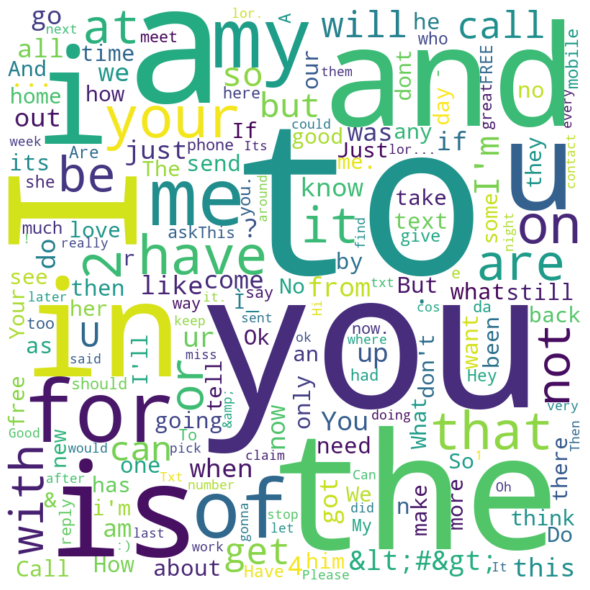

In [31]:
from wordcloud import WordCloud

# Create a list of all the words in the spam and ham messages
all_words = []
for message in spamData_frame[spamData_frame['label'] == 1]['text']:
    all_words.extend(message.split())
for message in spamData_frame[spamData_frame['label'] == 0]['text']:
    all_words.extend(message.split())

# Create a dictionary mapping words to their frequency
word_counts = {}
for word in all_words:
    if word not in word_counts:
        word_counts[word] = 1
    else:
        word_counts[word] += 1

# Create a wordcloud using the dictionary
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(word_counts)

# Show the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


# Building Machine Learning Model

In [32]:
# Training det has 75% and testing data set has 25% segregation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(messages,spamData_frame['label'],test_size=0.25,random_state=0)

In [33]:
X_train.shape

(3876, 11304)

In [34]:
y_train.shape

(3876,)

In [35]:
y_test.shape

(1293,)

## Naive Bayes Classifier 

To make a prediction, the Naive Bayes classifier calculates the probability of each class given the feature values of the instance, and then chooses the class with the highest probability as the prediction. The class probabilities are calculated using Bayes' theorem, which states that the probability of a class given the feature values is equal to the probability of the feature values given the class, multiplied by the probability of the class, divided by the probability of the feature values.

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [38]:
print(model.predict(X_train))

[0 1 0 ... 0 0 0]


In [39]:
print(y_train.values)

[0 1 0 ... 0 0 0]


In [40]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,plot_confusion_matrix
predicted_val = model.predict(X_test)
print(classification_report(predicted_val,y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1089
           1       0.93      0.78      0.85       204

    accuracy                           0.96      1293
   macro avg       0.95      0.89      0.91      1293
weighted avg       0.96      0.96      0.96      1293



# Accuracy Scores & Validation

In [41]:
print('Accuracy: ', accuracy_score(predicted_val,y_test)*100)

Accuracy:  95.6689868522815


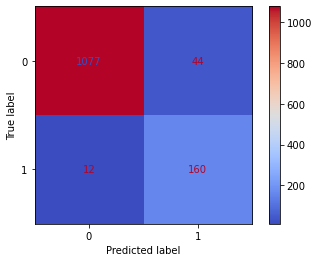

In [42]:
#plotting confusion matrix
confusion_matrix = plot_confusion_matrix(model, X_test, y_test, cmap='coolwarm')
plt.show()

Confusion Matrix will be explained in the report

In [43]:
#calculating root mean square error
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
np.sqrt(mse)

0.20811086342905033

In [44]:
pred_val = model.predict(X_train)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [46]:
print(classification_report(pred_val,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3400
           1       0.98      0.99      0.98       476

    accuracy                           1.00      3876
   macro avg       0.99      0.99      0.99      3876
weighted avg       1.00      1.00      1.00      3876



In [47]:
print(accuracy_score(pred_val,y_train)*100)

99.56140350877193


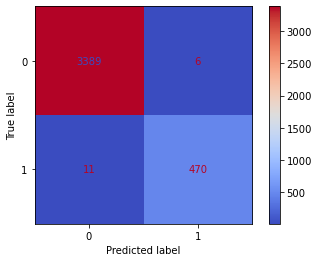

In [48]:
confusion_matrix = plot_confusion_matrix(model, X_train, y_train, cmap='coolwarm')
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train,pred_val)
np.sqrt(mse)

0.06622661785325219

In [50]:
!pip install nbconvert[webpdf]

In [51]:
!pip install pandoc